In [1]:
# Lets import some stuff
import tensorflow as tf
from skimage import io
import pandas as pd
from IPython.display import Image
from IPython.display import display
#from skimage.transform import resize
import matplotlib.pyplot as plt
from os import listdir
from os import mkdir
from skimage.io import imsave
import numpy as np
from sklearn.utils import shuffle
import sys
#import os
import cv2
from PIL import Image as PILImage
import numpy as np



print("Installed version of tensorflow is ", tf.__version__)
print("Important! tensorflow MUST be 1.2 or higher for this to work fine...")

Installed version of tensorflow is  1.2.1
Important! tensorflow MUST be 1.2 or higher for this to work fine...


In [2]:
DATA_DIR="/home/moriano/dev/code/loco-learning/cats-vs-dogs/data/test/"
def resize_and_pad(img, size, padColor=0):
    # Credits goes to 
    # https://stackoverflow.com/questions/44720580/resize-image-canvas-to-maintain-square-aspect-ratio-in-python-opencv
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    h, w = img.shape[:2]
    sh, sw = size

    # interpolation method
    if h > sh or w > sw: # shrinking image
        interp = cv2.INTER_AREA
    else: # stretching image
        interp = cv2.INTER_CUBIC

    # aspect ratio of image
    aspect = w/h

    # compute scaling and pad sizing
    if aspect > 1: # horizontal image
        new_w = sw
        new_h = np.round(new_w/aspect).astype(int)
        pad_vert = (sh-new_h)/2
        pad_top, pad_bot = np.floor(pad_vert).astype(int), np.ceil(pad_vert).astype(int)
        pad_left, pad_right = 0, 0
    elif aspect < 1: # vertical image
        new_h = sh
        new_w = np.round(new_h*aspect).astype(int)
        pad_horz = (sw-new_w)/2
        pad_left, pad_right = np.floor(pad_horz).astype(int), np.ceil(pad_horz).astype(int)
        pad_top, pad_bot = 0, 0
    else: # square image
        new_h, new_w = sh, sw
        pad_left, pad_right, pad_top, pad_bot = 0, 0, 0, 0

    # set pad color
    if len(img.shape) is 3 and not isinstance(padColor, (list, tuple, np.ndarray)): # color image but only one color provided
        padColor = [padColor]*3

    # scale and pad
    scaled_img = cv2.resize(img, (new_w, new_h), interpolation=interp)
    scaled_img = cv2.copyMakeBorder(scaled_img, pad_top, pad_bot, 
                                    pad_left, pad_right, 
                                    borderType=cv2.BORDER_CONSTANT, value=padColor)

    return scaled_img


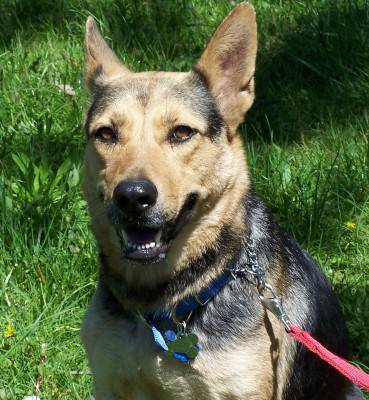

In [3]:
my_image = DATA_DIR+'42.jpg'
Image(my_image)

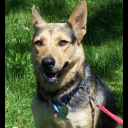

In [4]:
original = cv2.imread(my_image)
resized = resize_and_pad(original, (128, 128))
data = resized
PILImage.fromarray(data, 'RGB')

In [5]:
session = tf.InteractiveSession()

print("Loading meta graph...")    
loader = tf.train.import_meta_graph('/home/moriano/Desktop/catsvsdogs/floyd_50000_batch16_step-4.meta')
print("Meta graph loaded...")
print("Restoring session...")
loader.restore(session, '/home/moriano/Desktop/catsvsdogs/floyd_50000_batch16_step-4')

graph = tf.get_default_graph()

"""
Ok, so here's the thing, for some reason, even though I named the tensors as 
    accuracy
    X
    y

Looks like internally tensorflow stores them in the form "name:NUMBER" so you cannot do 

graph.get_tensor_by_name("accuracy") 

Because that will return an operation instead of a tensor. 

Not a big deal, seems that simply doing

graph.get_tensor_by_name("accuracy:0")

Fixes the problem
"""
predictions = graph.get_tensor_by_name("predictions:0")
dropout_rate = graph.get_tensor_by_name("dropout_rate:0")
is_training = graph.get_tensor_by_name("is_training:0")
dropout_training = 0.5

X = graph.get_tensor_by_name("X:0")
y = graph.get_tensor_by_name("y:0")
#session.run(tf.global_variables_initializer())
#session.run(accuracy, feed_dict={X: X_test, y: y_test})
#print("Accuracy (test) is %.3f" %  accuracy.eval(feed_dict={X: X_test, y: y_test}))
cost = graph.get_tensor_by_name("cost:0")
print("DONE!")



Loading meta graph...
Meta graph loaded...
Restoring session...
INFO:tensorflow:Restoring parameters from /home/moriano/Desktop/catsvsdogs/floyd_50000_batch16_step-4
DONE!


In [6]:
tf.global_variables_initializer()

<tf.Operation 'init_1' type=NoOp>

In [10]:
def perform_prediction(file_name, show_plots=True):
    resized = np.empty((1, 128, 128, 3))  # Prepare array to store image


    dropout_training = 0.5
    #Read image, reshape it and display it
    raw_image = cv2.imread(file_name)
    resized_image = cv2.resize(raw_image, (128, 128))
    PILImage.fromarray(resized_image, 'RGB')

    resized[0] = resized_image

    normalized = (resized - 0) / (255 - 0)

    #session.run(predictions, feed_dict={X: normalized, 
    #                                               dropout_rate: dropout_training,
    #                                               is_training:False})

    # Plot the predictions
    # Remember
    # CAT_LABEL = 1
    # DOG_LABEL = 0
    prediction_values = predictions.eval(feed_dict={X: normalized, 
                                                   dropout_rate: dropout_training,
                                                   is_training:False})

    possible_answers = [0, 1]
    my_prediction = prediction_values[0, :]    
    
    pred = pd.DataFrame(my_prediction, ["DOG", "CAT"])
    
    if show_plots:
        pred.plot(kind="bar", legend=False, title="prediction")
        display(Image(filename=file_name, retina=True))
        plt.show()
        print("+--------------------------------------------------+")
        print("|              PREDICTION ENDS HERE                |")
        print("+--------------------------------------------------+")
    return pred

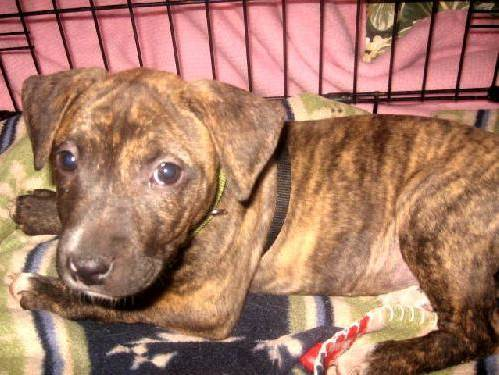

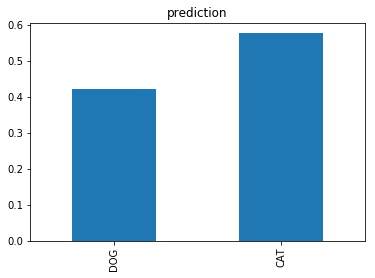

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


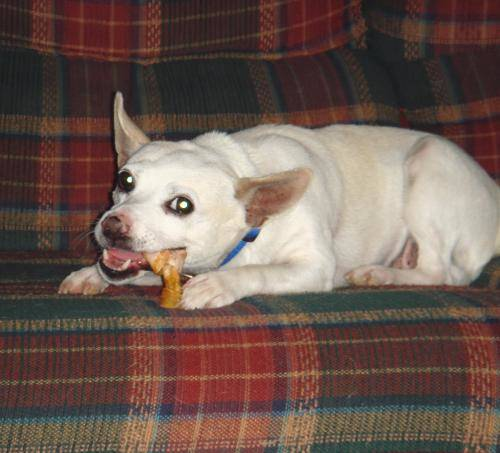

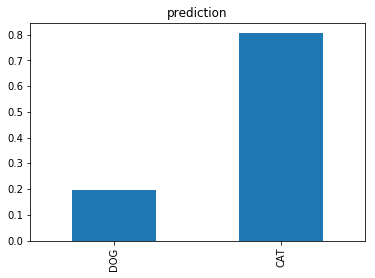

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


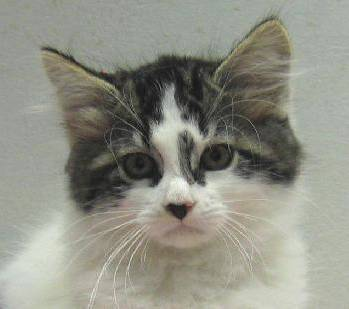

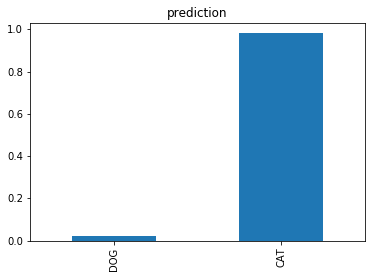

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


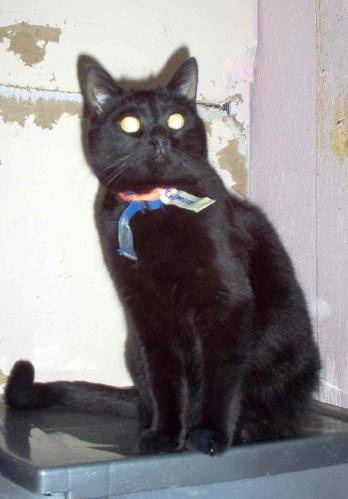

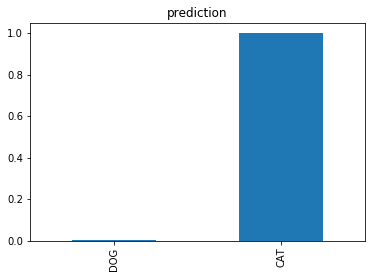

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


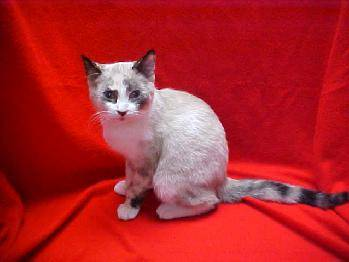

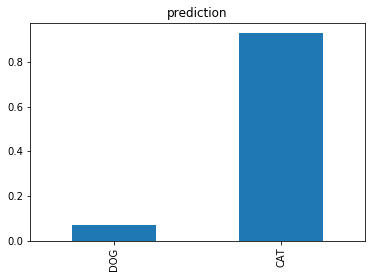

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


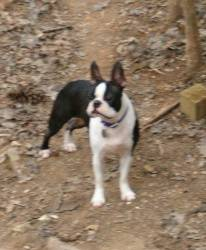

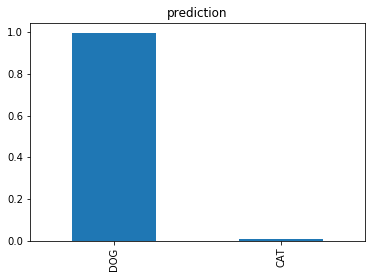

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


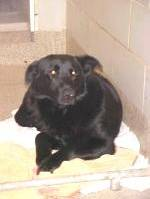

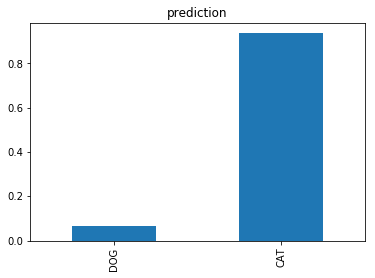

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


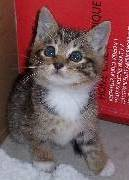

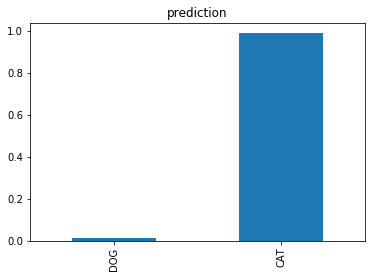

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


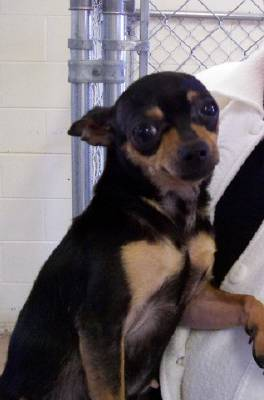

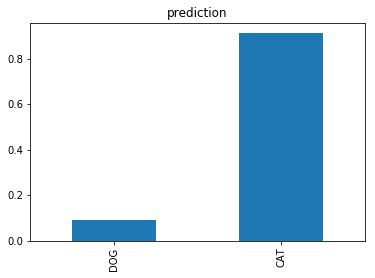

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


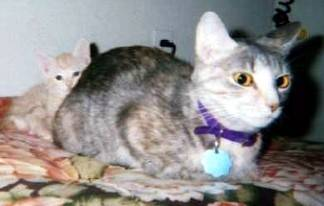

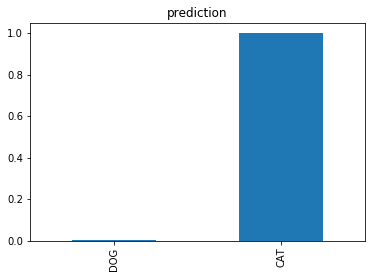

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


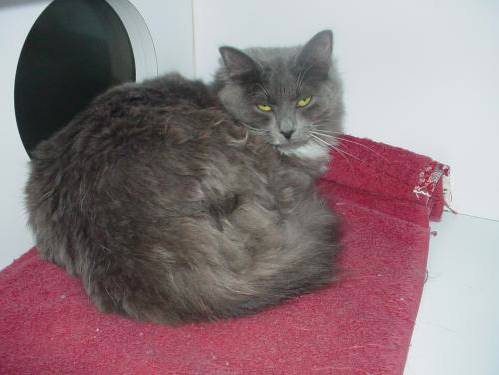

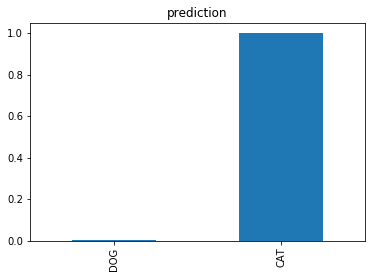

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


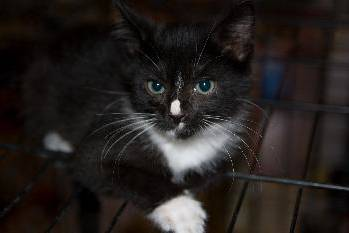

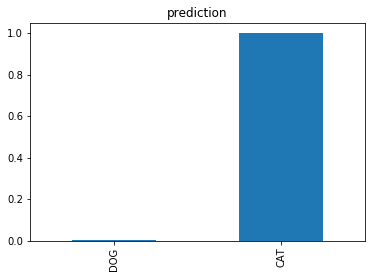

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


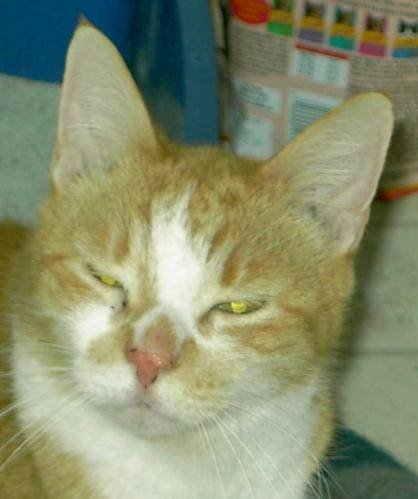

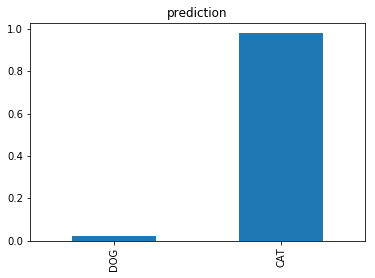

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


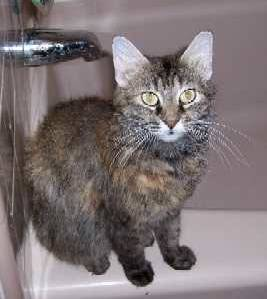

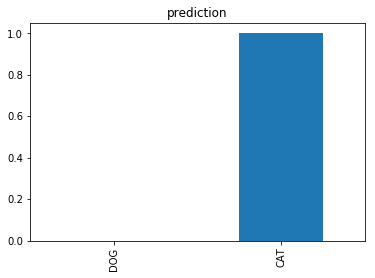

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


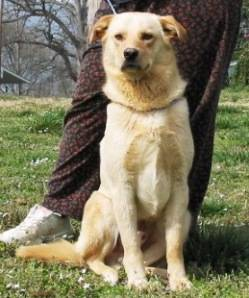

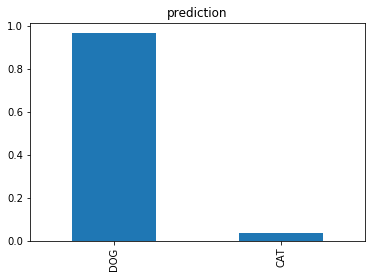

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


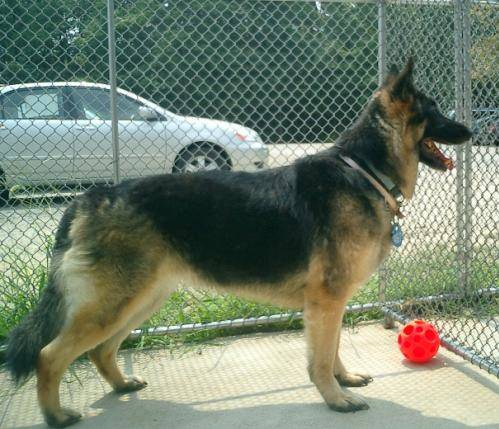

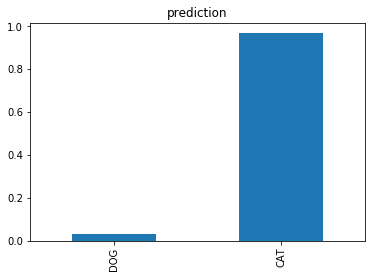

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


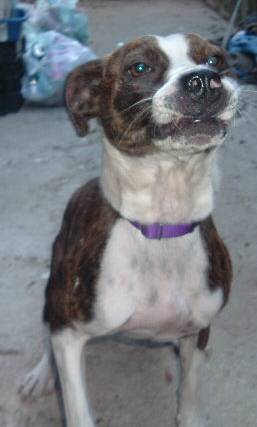

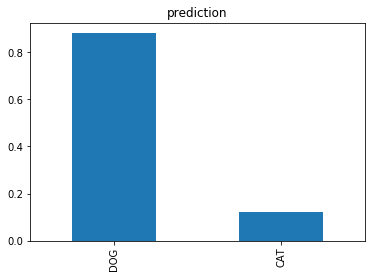

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


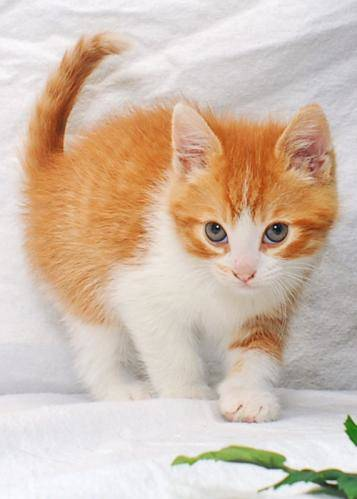

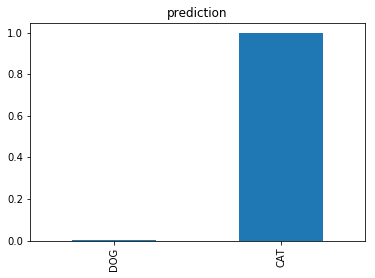

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


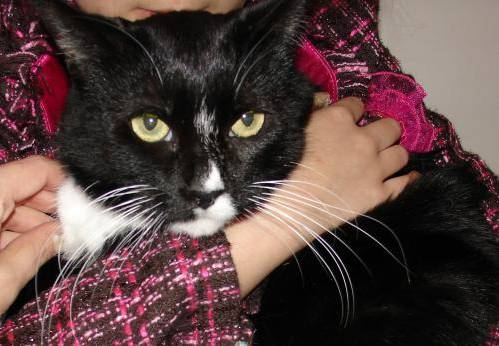

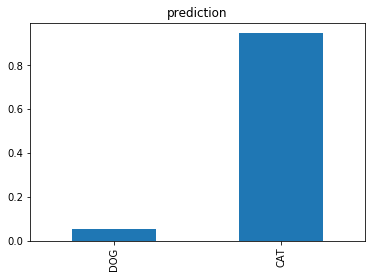

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


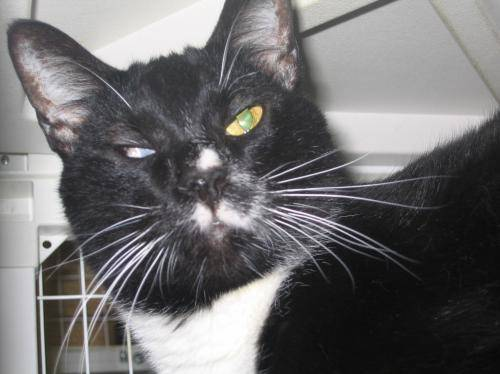

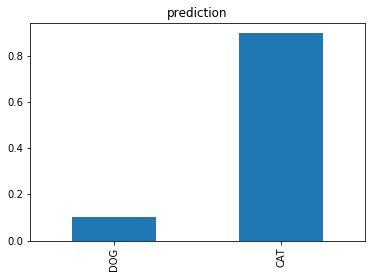

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


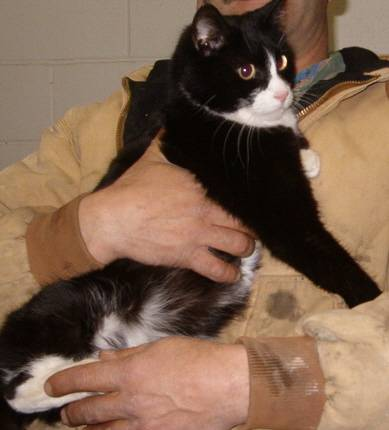

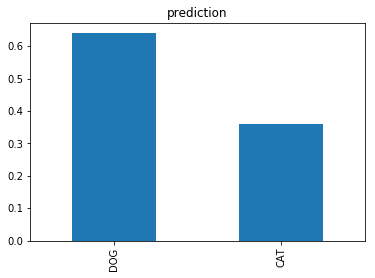

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


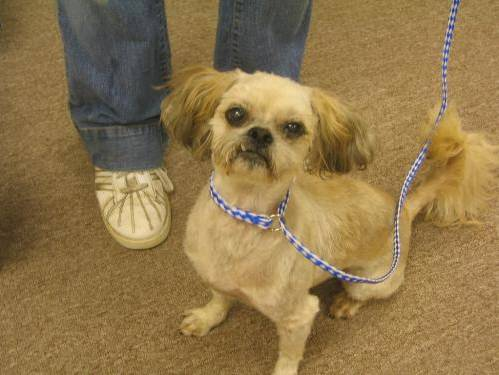

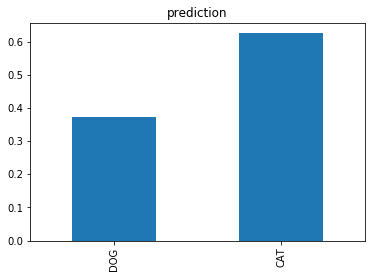

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


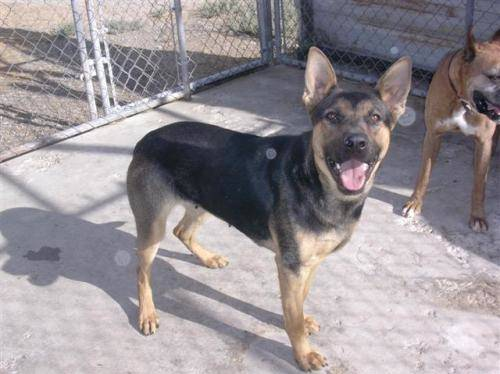

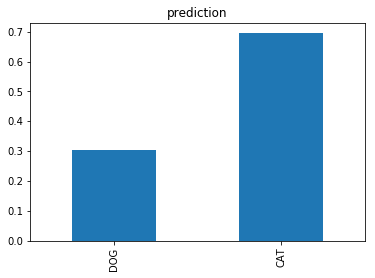

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


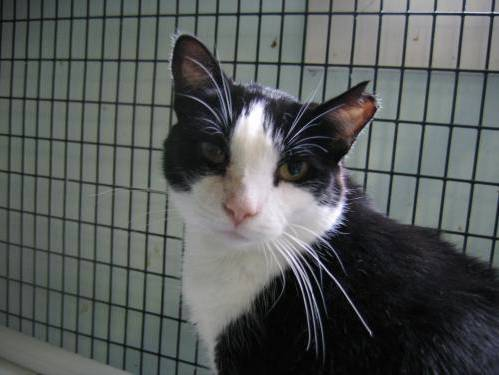

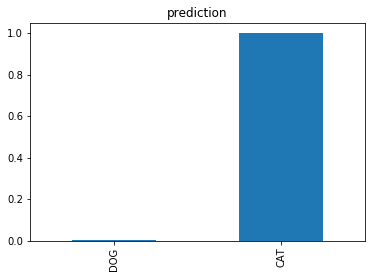

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


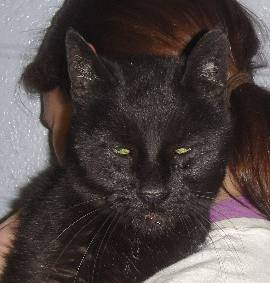

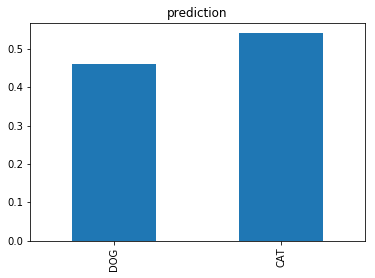

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


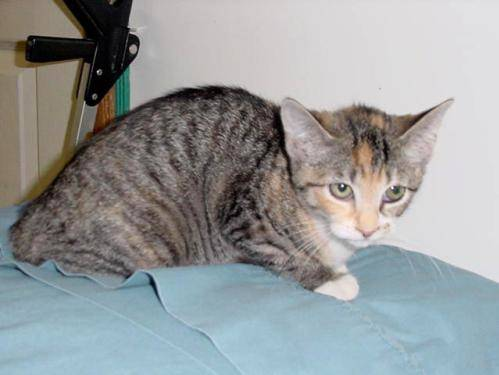

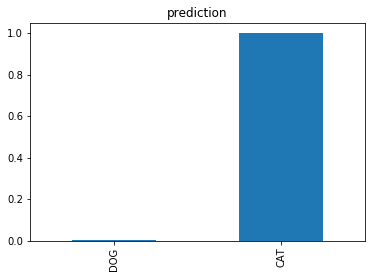

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


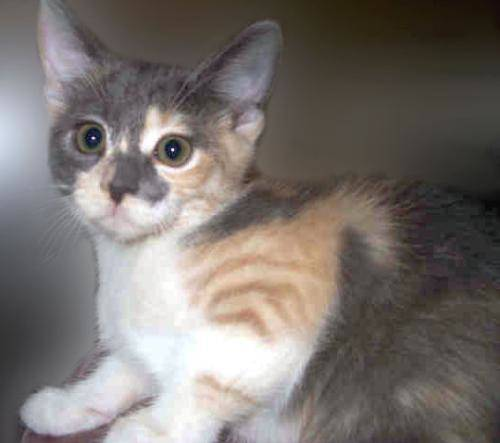

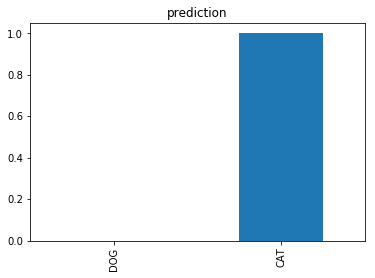

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


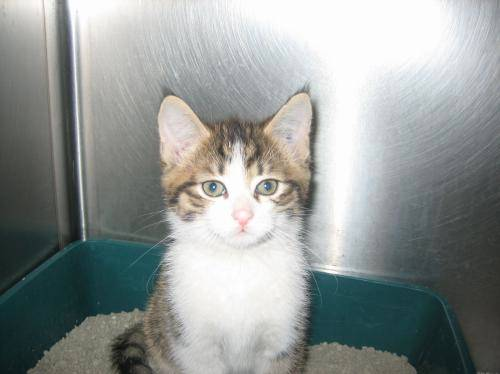

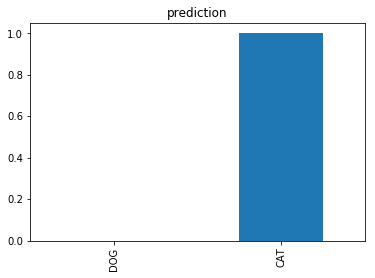

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


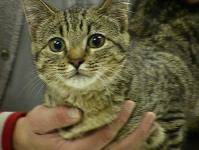

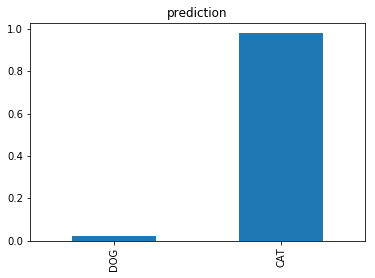

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


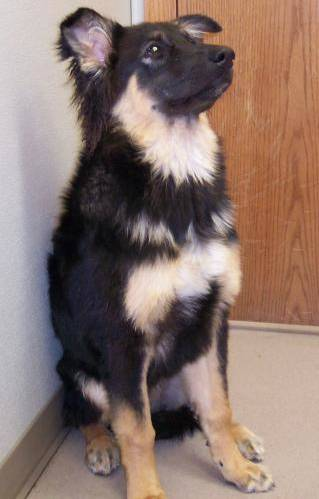

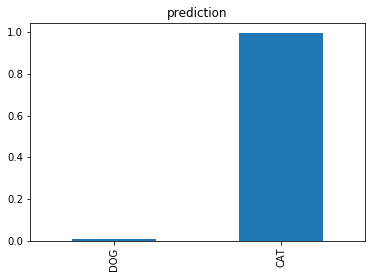

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


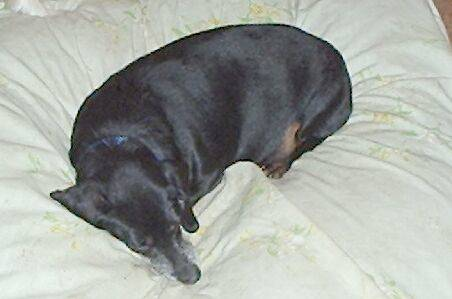

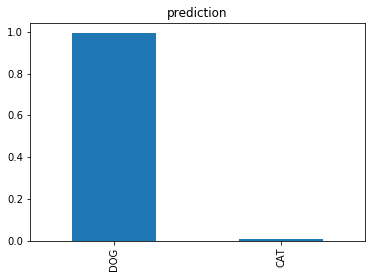

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


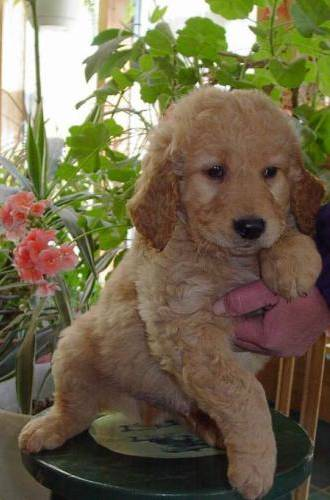

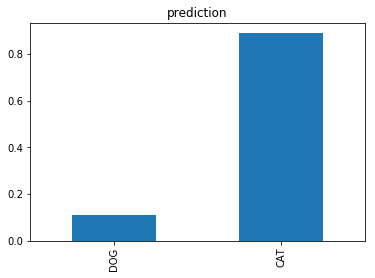

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


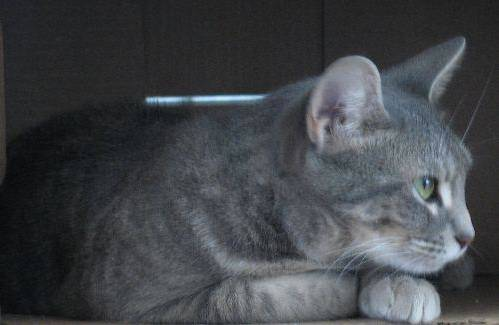

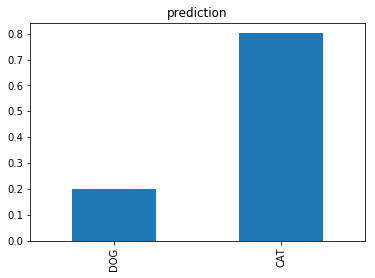

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


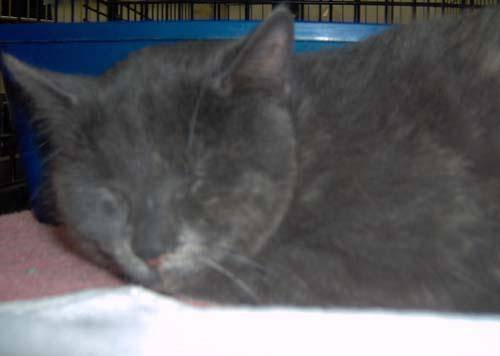

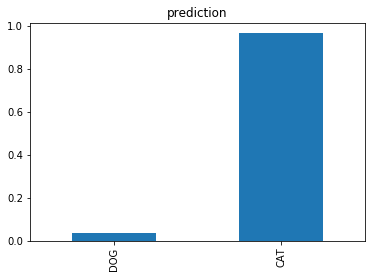

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


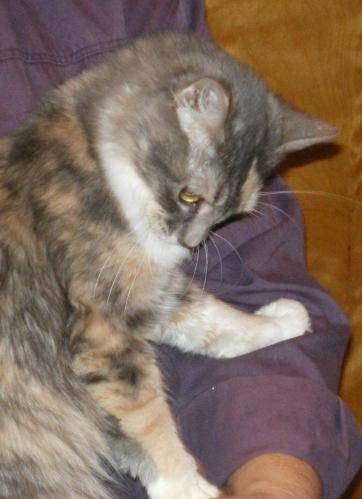

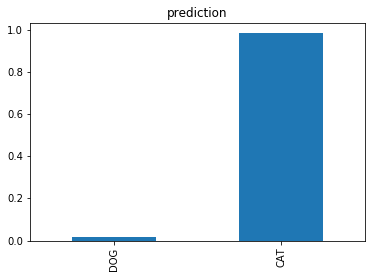

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


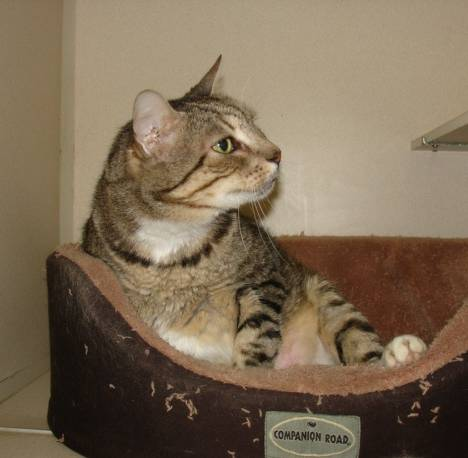

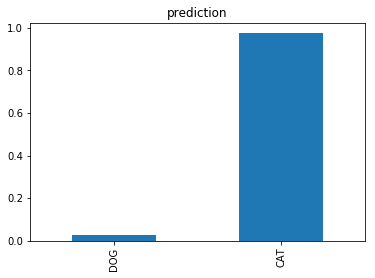

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


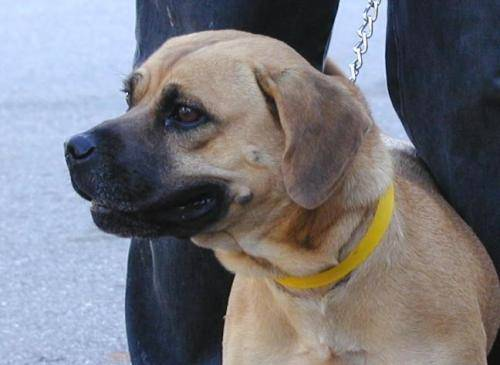

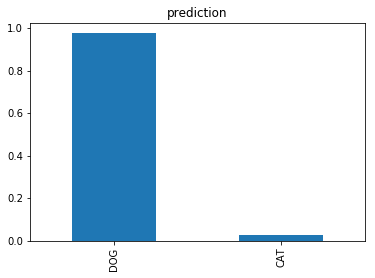

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


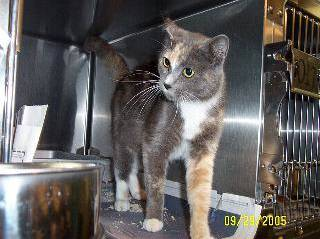

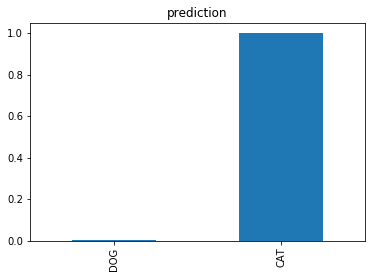

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


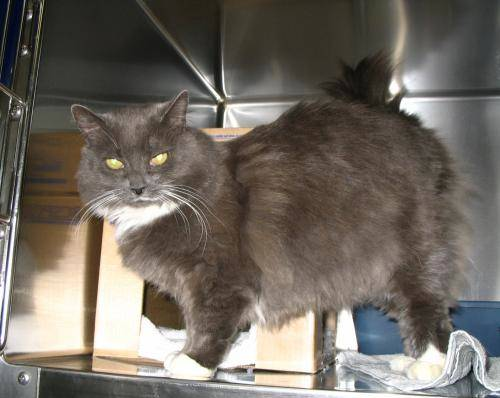

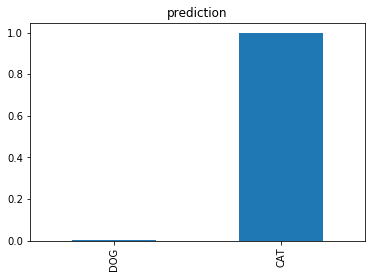

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


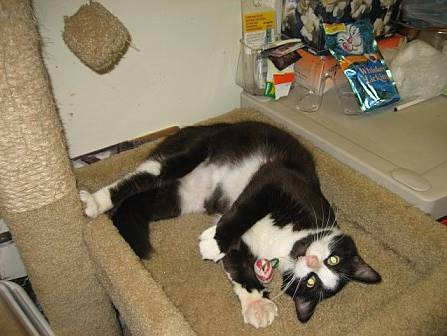

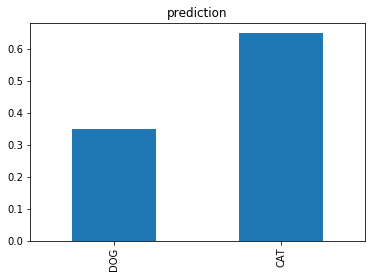

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


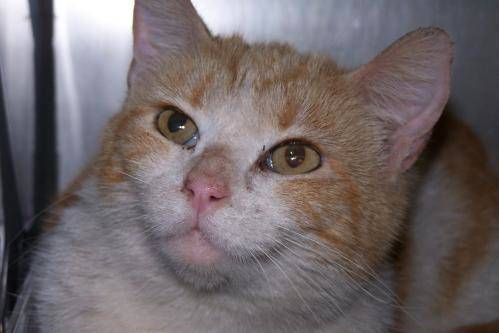

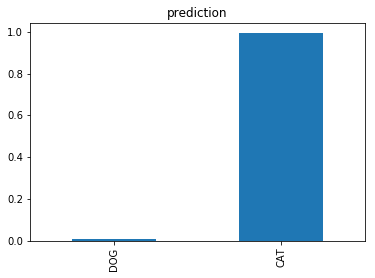

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


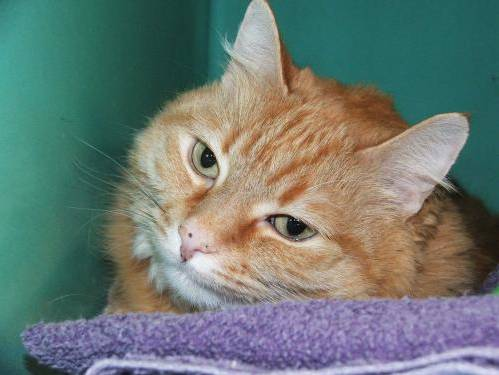

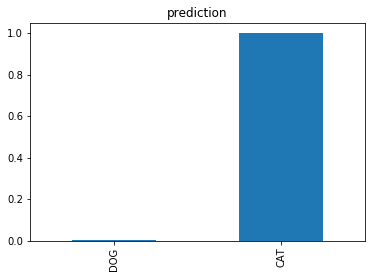

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


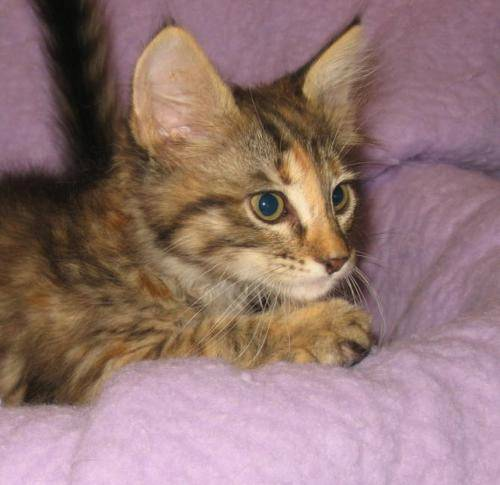

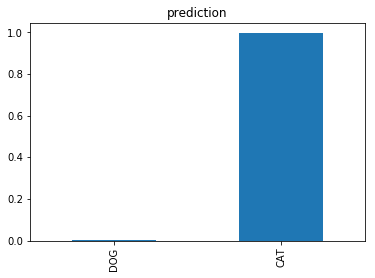

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


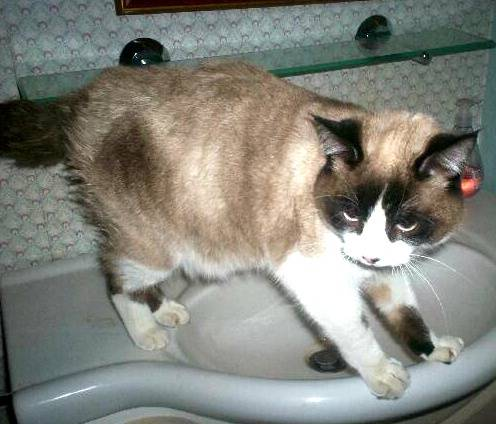

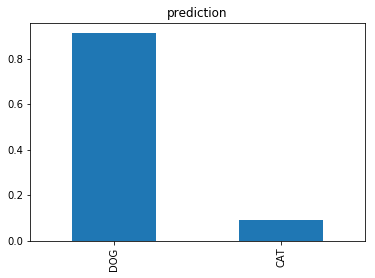

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


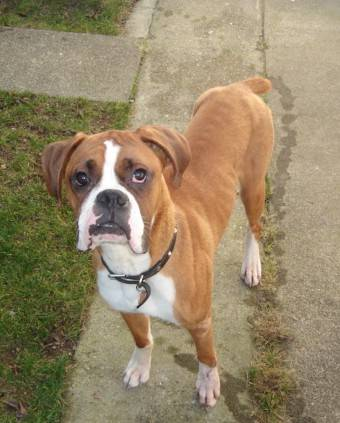

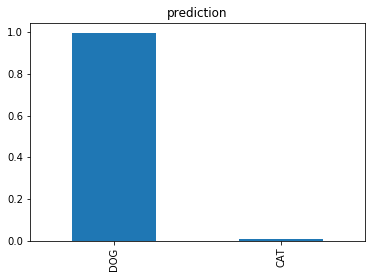

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


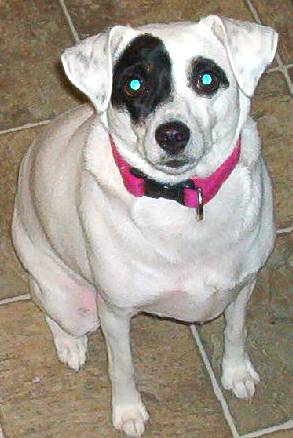

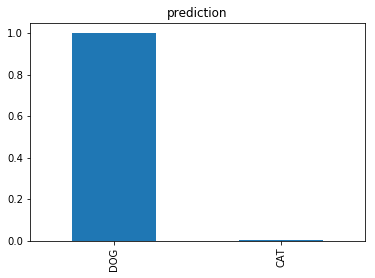

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


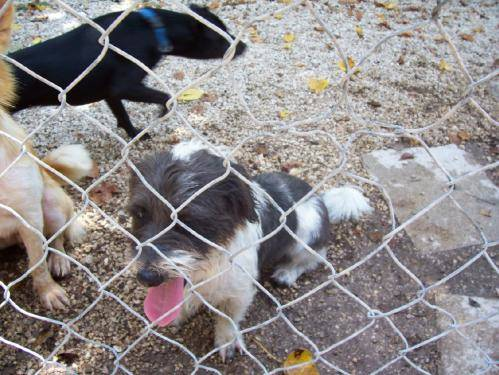

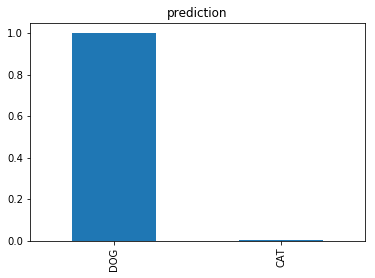

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


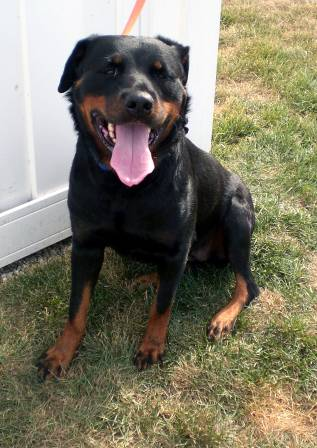

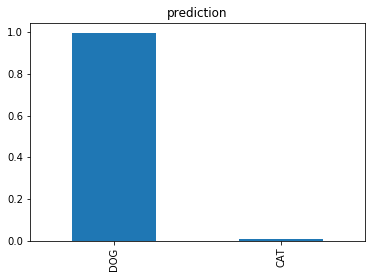

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


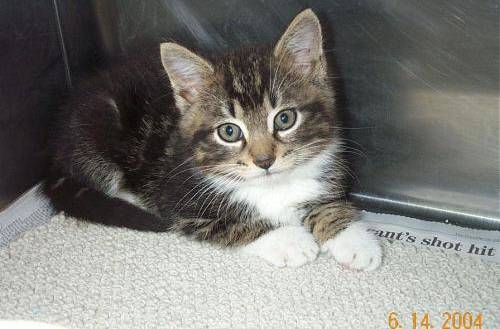

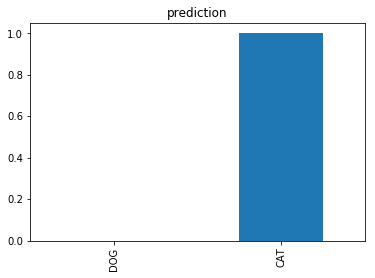

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


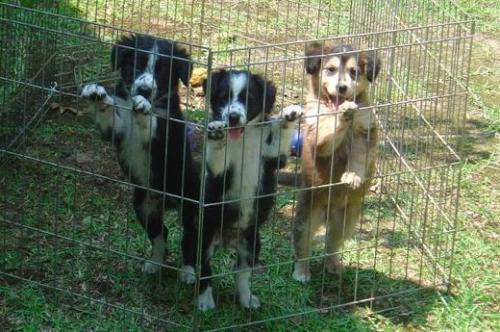

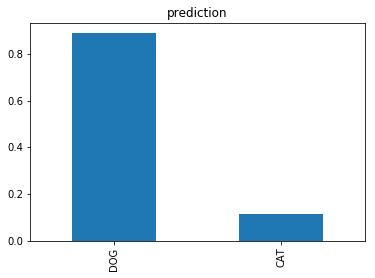

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


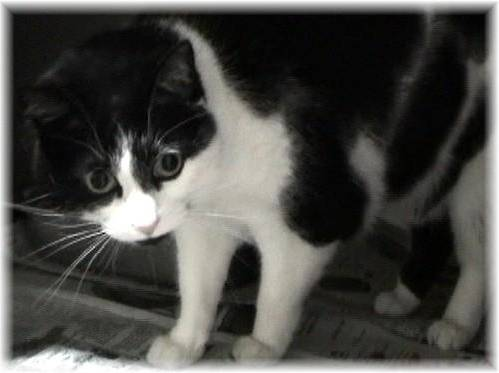

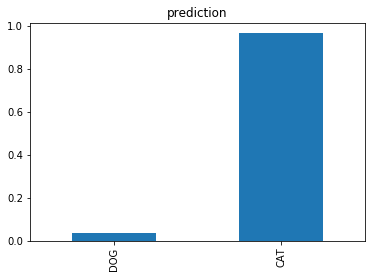

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


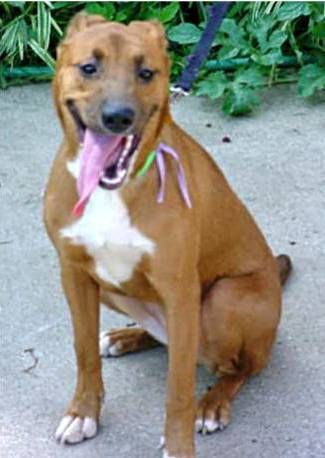

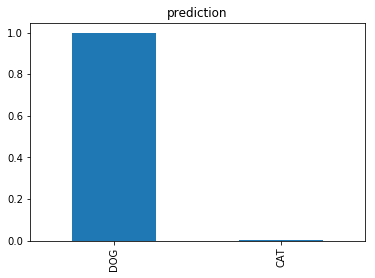

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


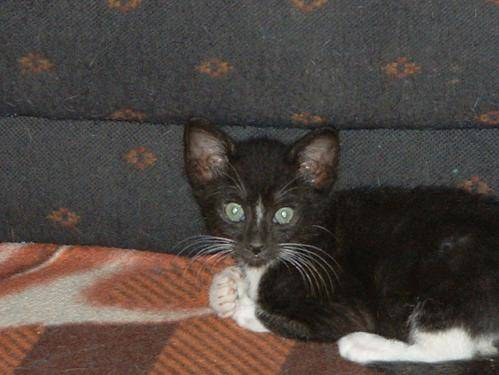

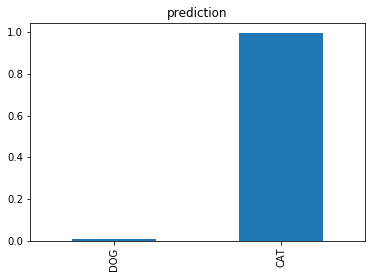

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


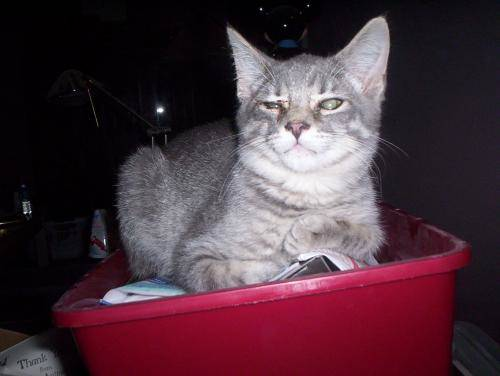

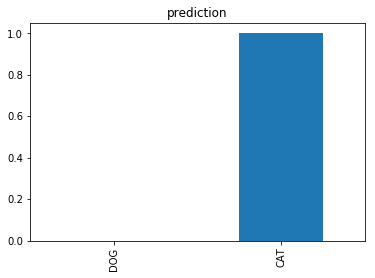

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


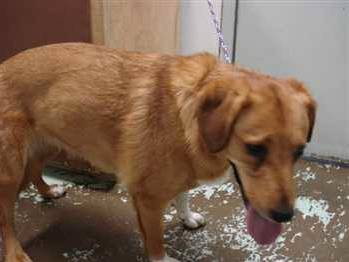

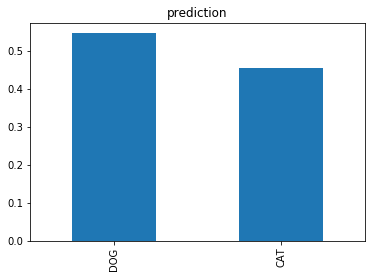

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


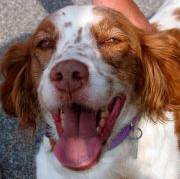

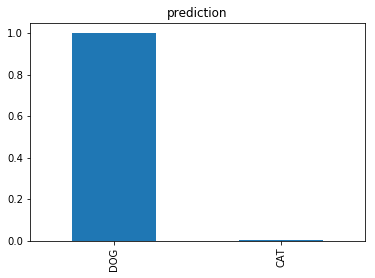

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


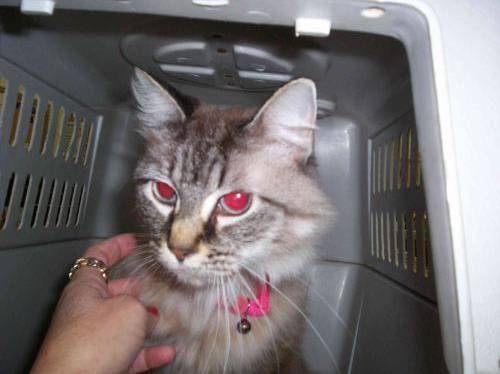

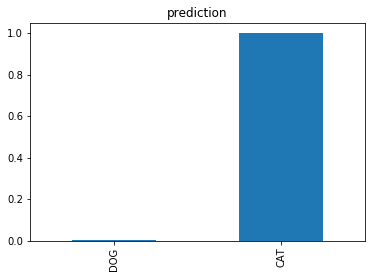

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


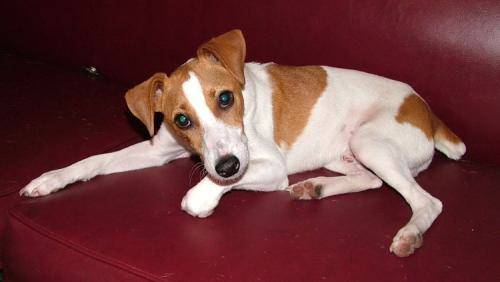

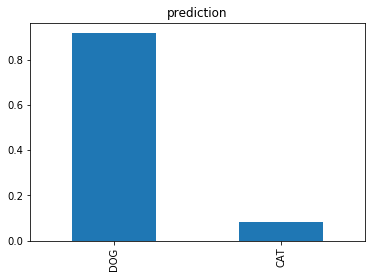

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


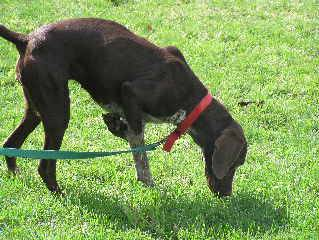

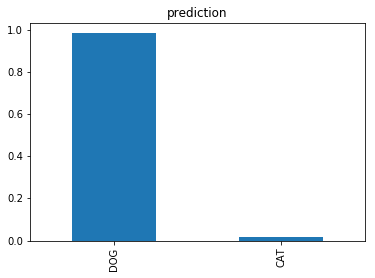

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


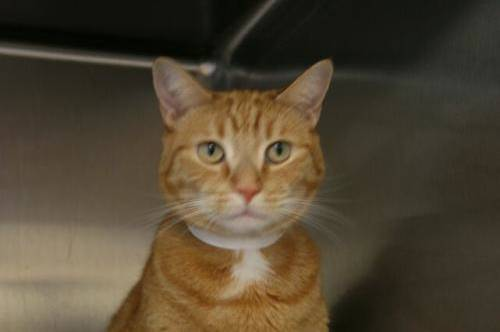

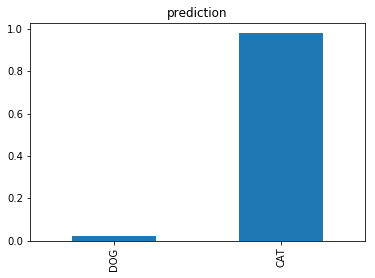

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


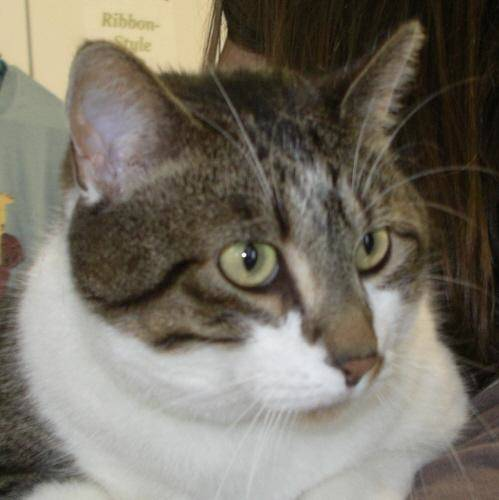

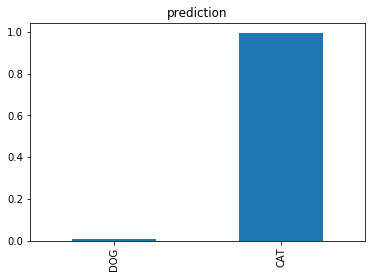

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


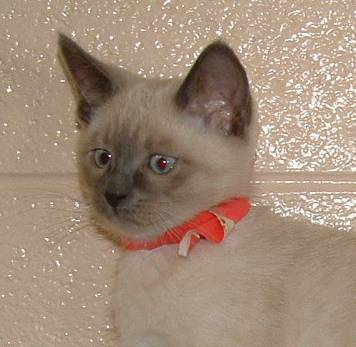

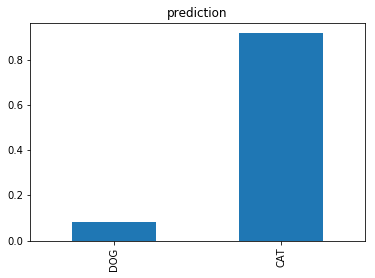

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


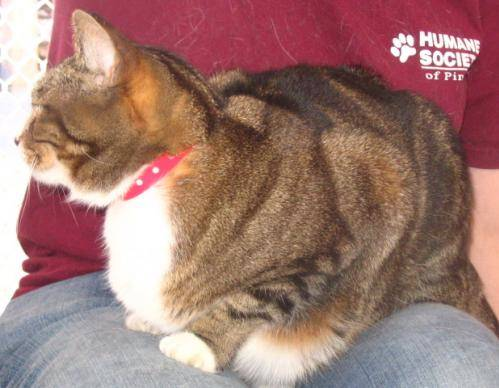

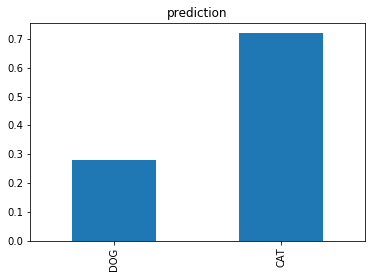

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


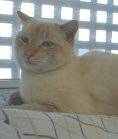

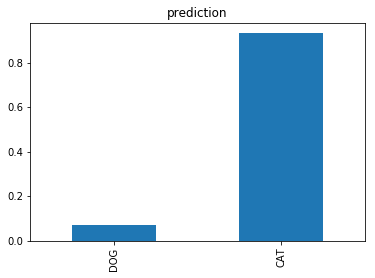

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


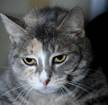

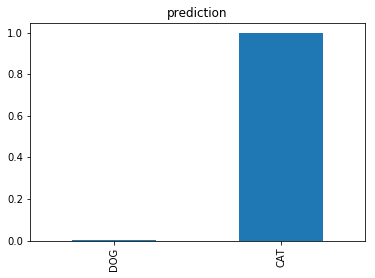

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


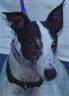

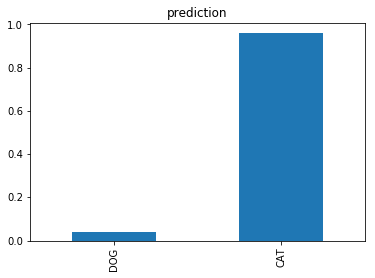

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


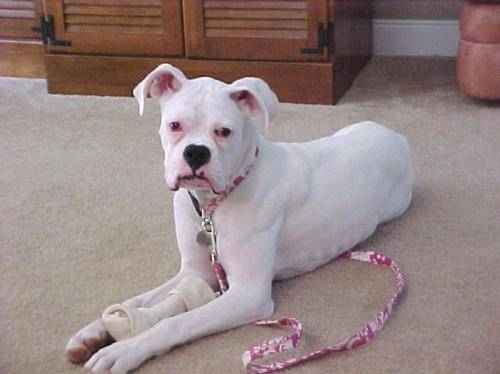

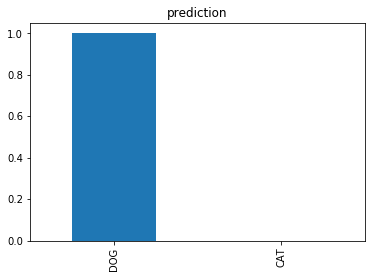

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


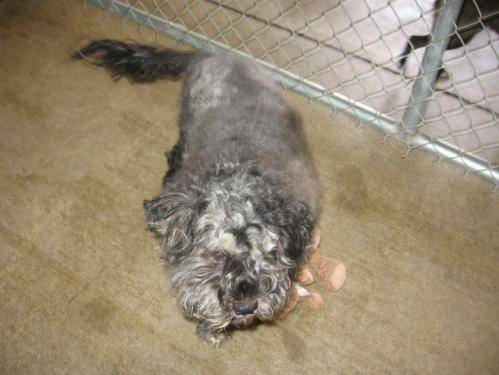

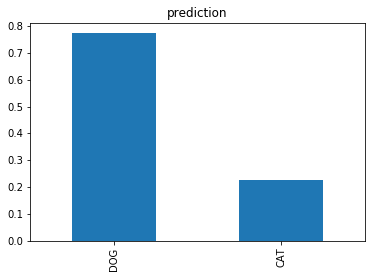

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


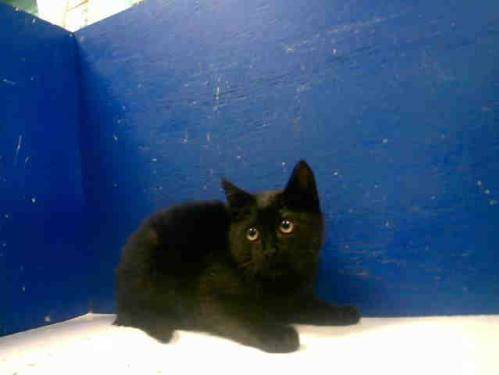

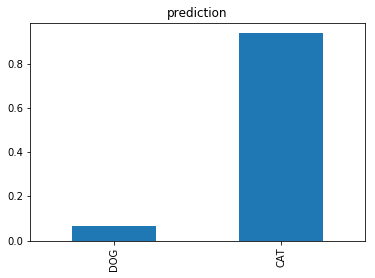

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


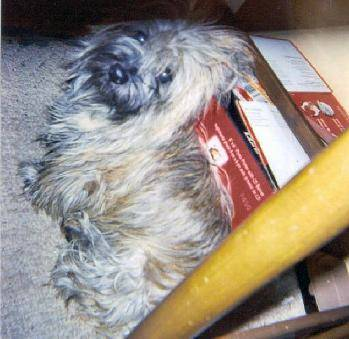

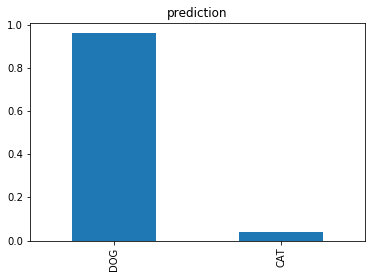

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


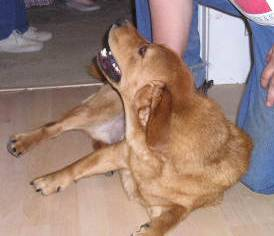

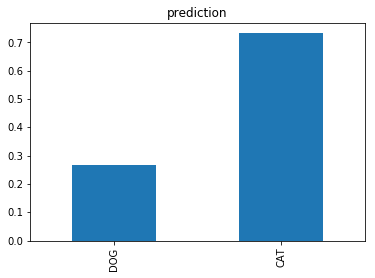

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


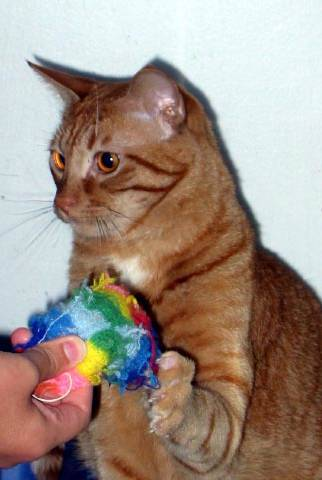

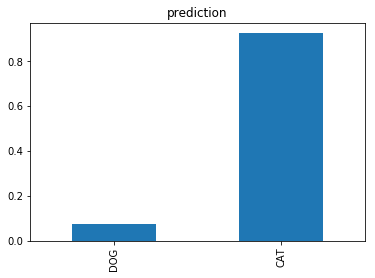

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


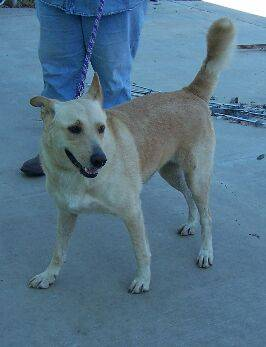

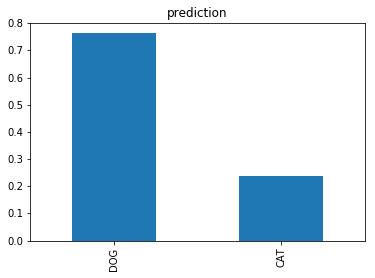

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


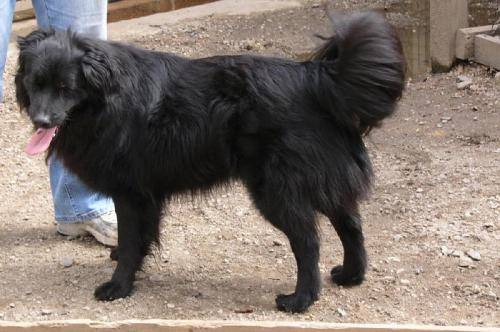

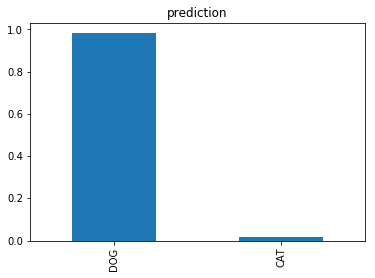

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


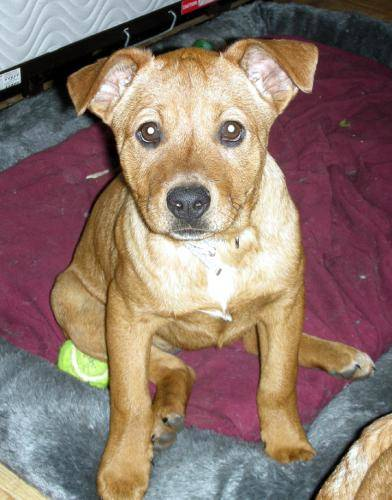

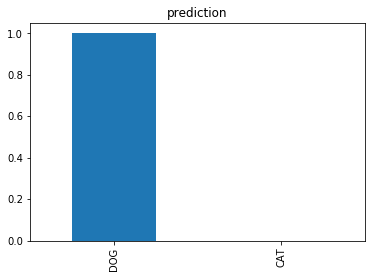

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


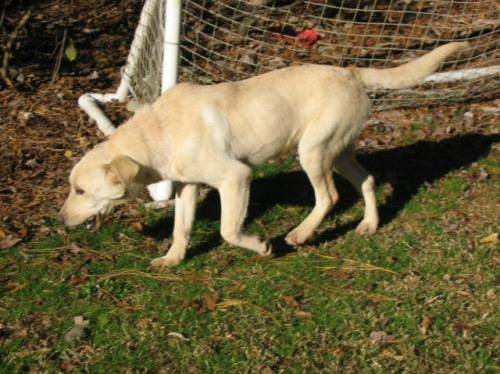

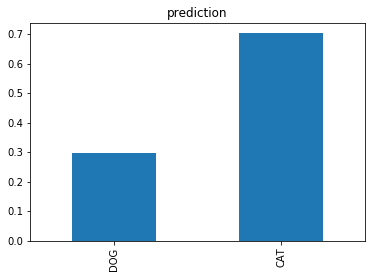

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


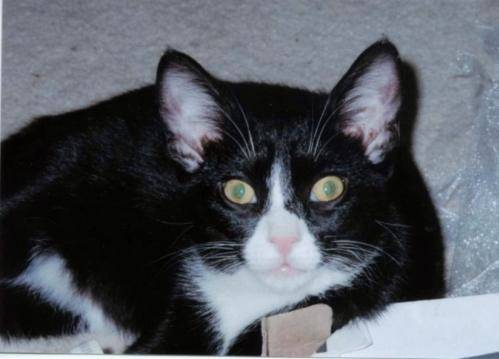

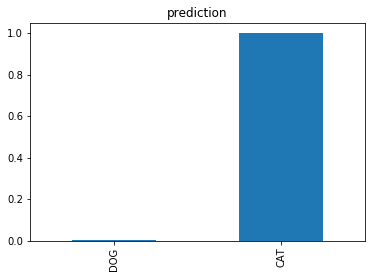

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


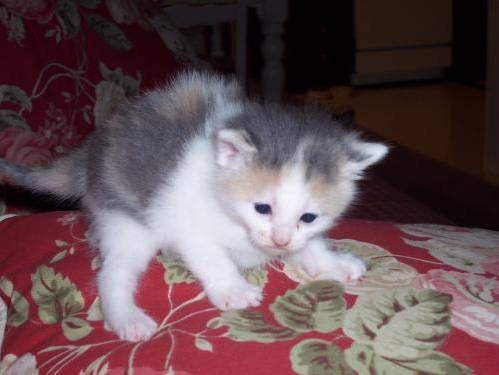

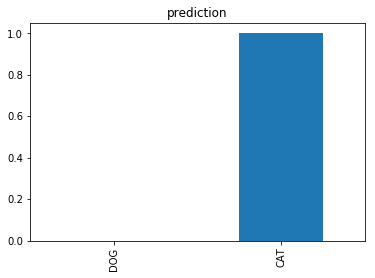

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


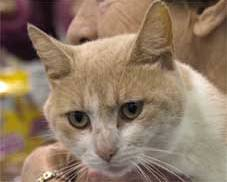

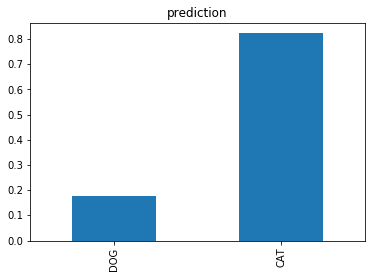

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


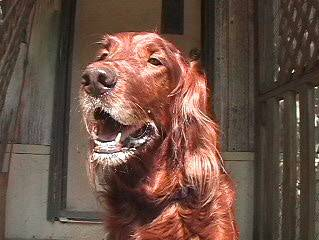

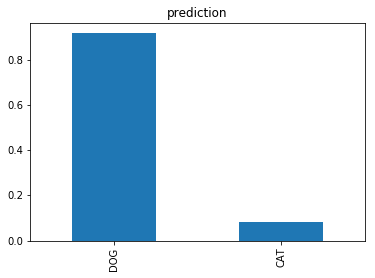

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


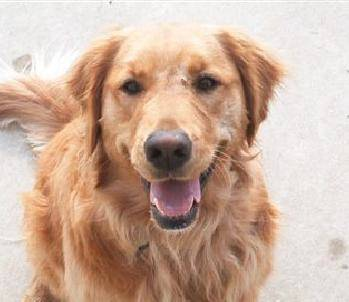

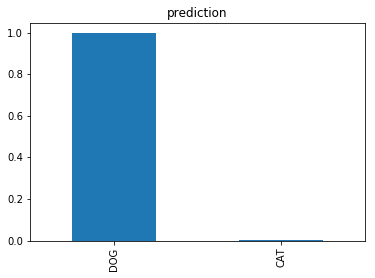

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


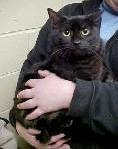

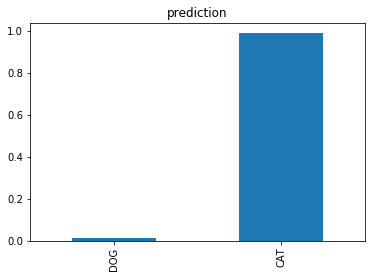

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


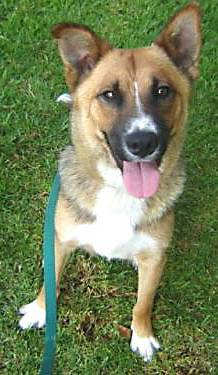

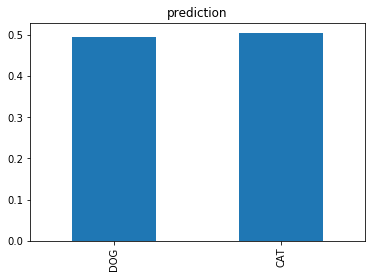

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


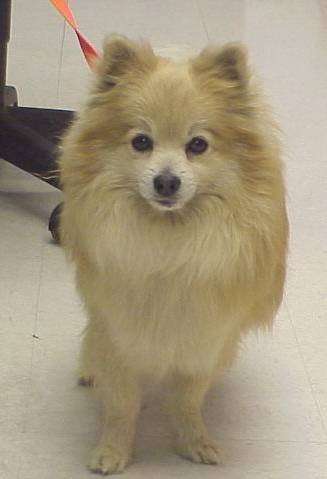

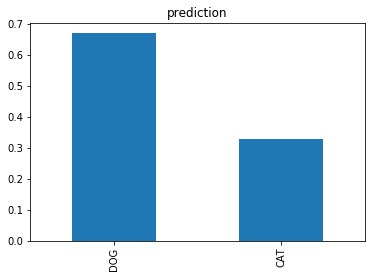

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


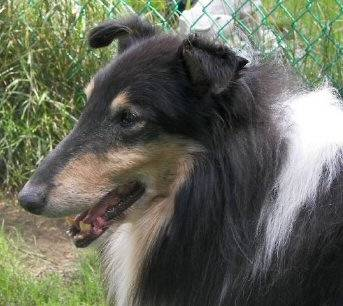

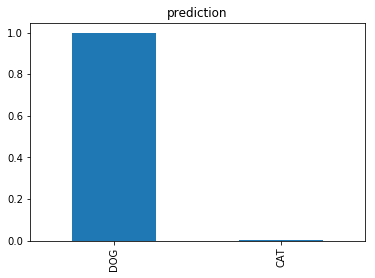

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


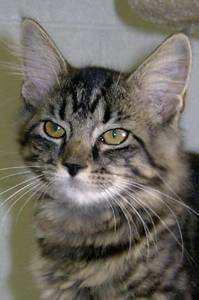

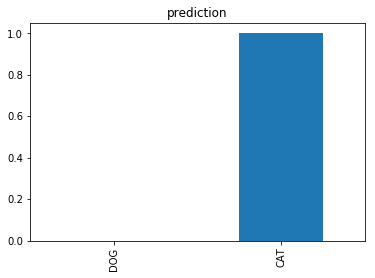

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


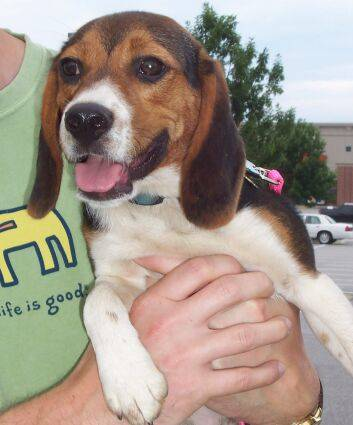

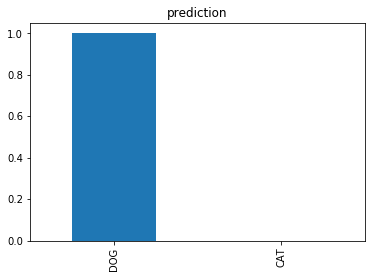

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


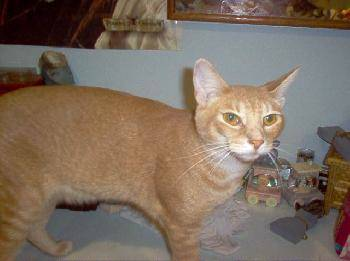

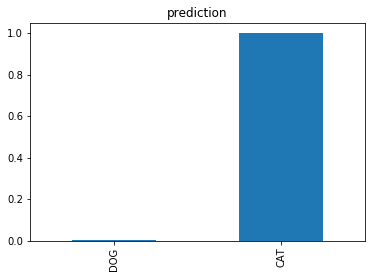

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


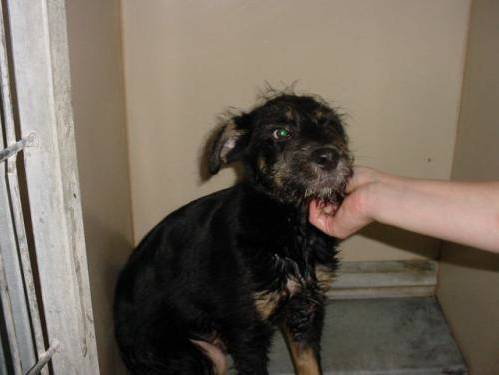

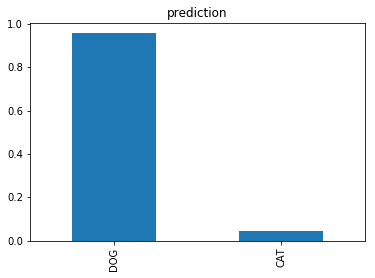

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


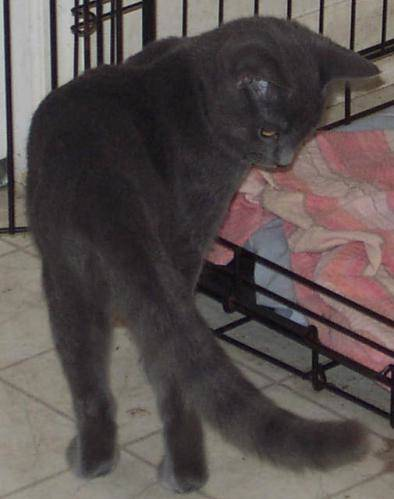

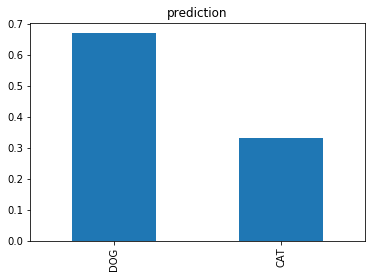

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


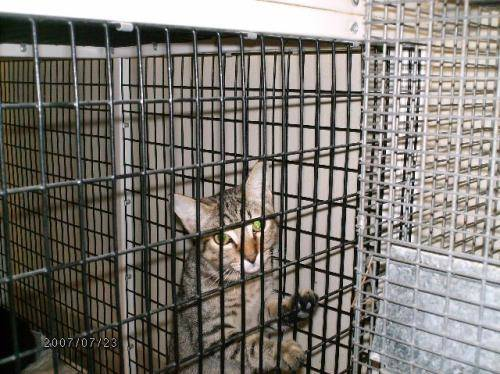

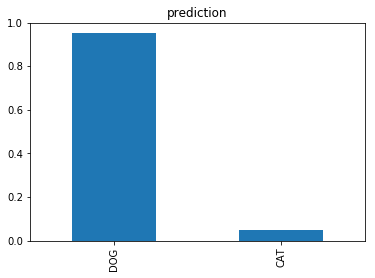

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


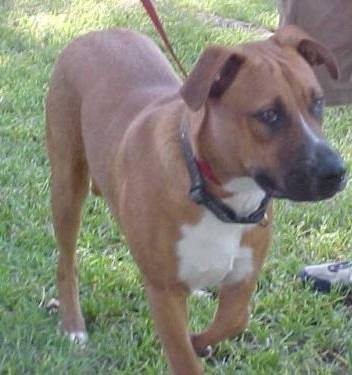

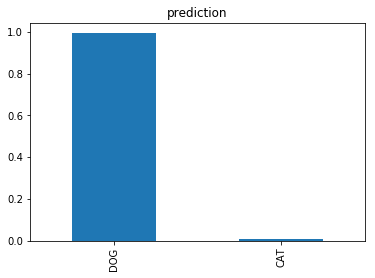

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


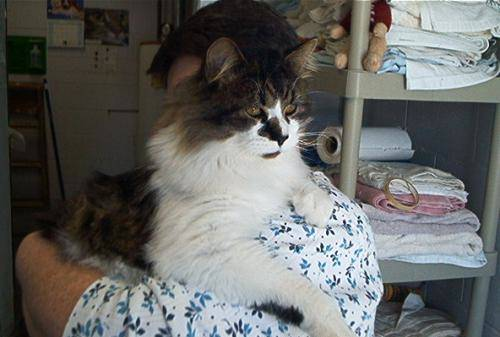

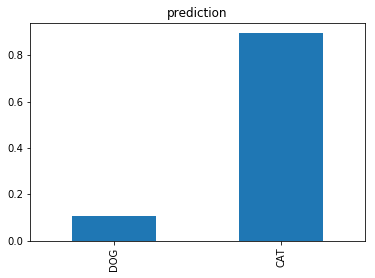

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


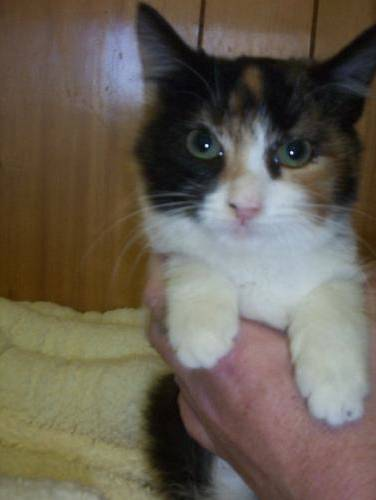

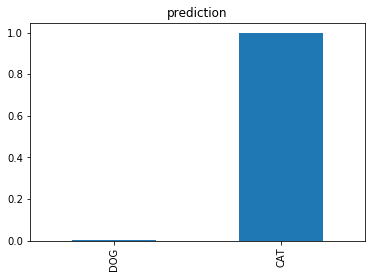

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


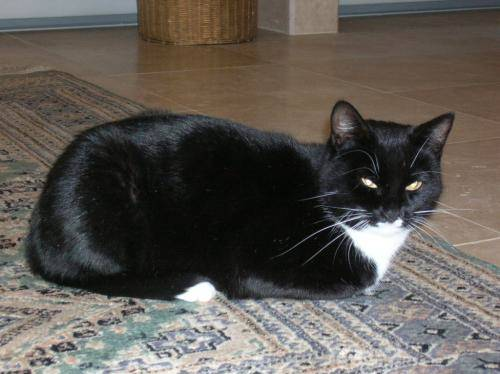

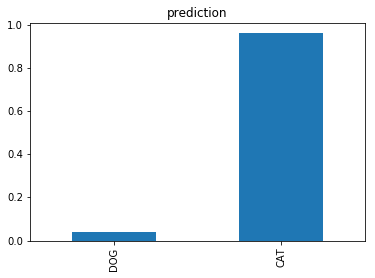

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


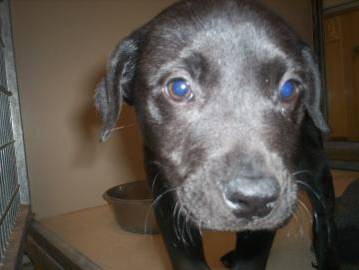

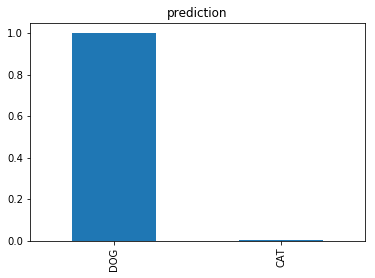

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


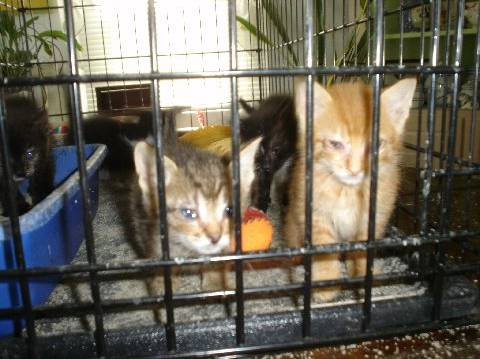

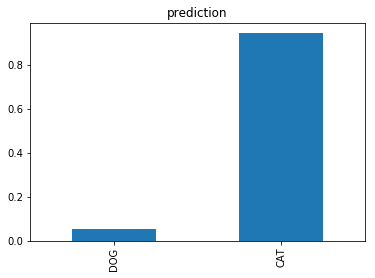

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


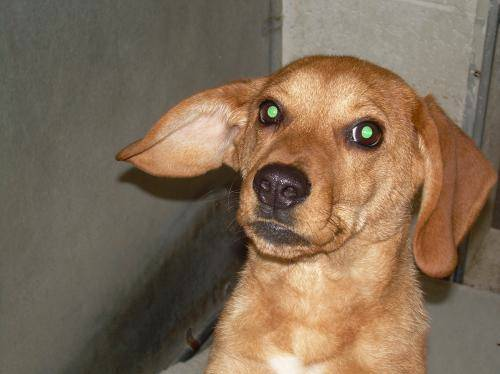

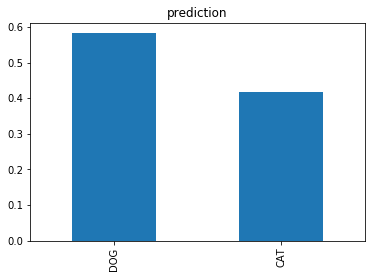

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


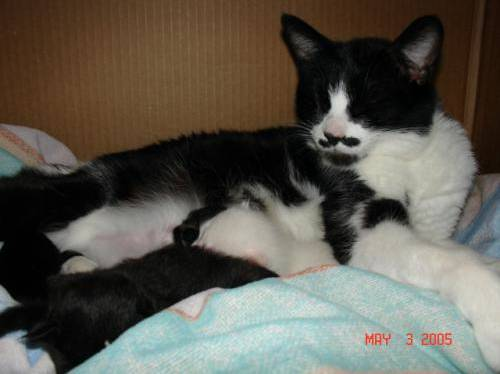

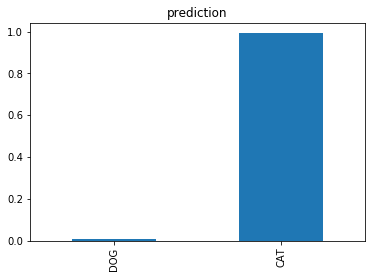

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


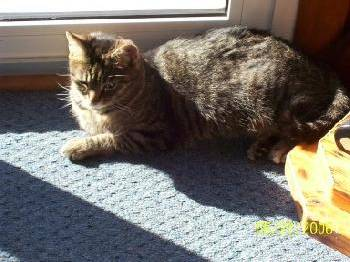

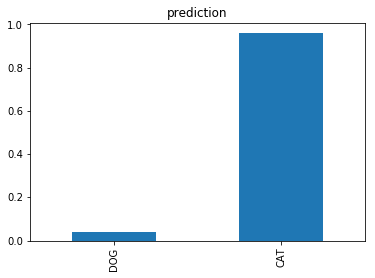

+--------------------------------------------------+
|              PREDICTION ENDS HERE                |
+--------------------------------------------------+


In [14]:
for i in range(1100, 1200):
    file_image = DATA_DIR+'%d.jpg' % i
    output = perform_prediction(file_image, True)


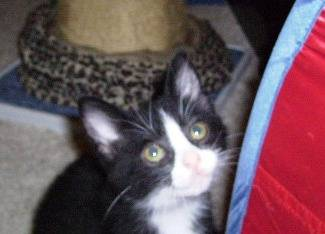

In [9]:
display(Image(filename="/home/moriano/dev/code/loco-learning/cats-vs-dogs/data/test/8.jpg", retina=True))